In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/archive (4).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
true = pd.read_csv('/content/True.csv')
fake = pd.read_csv('/content/Fake.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Add the true label

true['label'] = 'True'

In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
true.shape

(21417, 5)

In [ ]:
#Add the fake label

fake['label'] = 'Fake'

In [ ]:
fake.shape

(23481, 5)

In [ ]:
#Add both the fake and true dataset

data = pd.concat([true, fake], axis=0, ignore_index=True)

In [ ]:
data.shape

(44898, 5)

In [ ]:
data.sample(frac=1).reset_index(drop=True)

,title,text,subject,date,label
0,South Korean firms flock to Beijing hoping sum...,SEOUL (Reuters) - Hoping a thaw in relations w...,worldnews,"December 13, 2017",True
1,"Jake Tapper STUNNED By Trump’s Stupidity, SHR...",If there s one thing Donald Trump has an extre...,News,"April 14, 2017",Fake
2,UK queen and husband Philip celebrate 70 years...,LONDON (Reuters) - Queen Elizabeth and husband...,worldnews,"November 20, 2017",True
3,"This New Poll Is TERRIFIC News For Democrats,...",While Democratic and Republicans candidates co...,News,"March 1, 2016",Fake
4,ISRAEL WILL NAME New Train Station Near Wester...,Israel s transportation minister is pushing ah...,politics,"Dec 27, 2017",Fake
...,...,...,...,...,...
44893,'This is not a life': migrants stranded on Gre...,"LESBOS, Greece (Reuters) - Syrian migrant Bash...",worldnews,"December 7, 2017",True
44894,WELCOME TO AMERICA: Most Refugees Are On Food ...,A strikingly high percentage of refugees to th...,politics,"Apr 5, 2015",Fake
44895,"OOPS! NEW EVIDENCE SHOWS HILLARY’S 33,000 EMAI...","For months now, we ve been told that Hillary C...",politics,"Oct 26, 2016",Fake
44896,Racist David Barton: Why Aren’t Blacks Thanki...,America has a very ugly history with regards t...,News,"February 28, 2016",Fake


In [ ]:
from sklearn.utils import shuffle

In [ ]:
#Shuffling the dataset

data = shuffle(data, random_state=42).reset_index(drop=True)

In [ ]:
data['label'].value_counts()

Fake    23481
True    21417
Name: label, dtype: int64

In [ ]:
#Encoding the label into numbers

data['label'] = data['label'].map({'True':1, 'Fake':0})

In [ ]:
data.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data['subject'].value_counts().index

Index(['politicsNews', 'worldnews', 'News', 'politics', 'left-news',
       'Government News', 'US_News', 'Middle-east'],
      dtype='object')

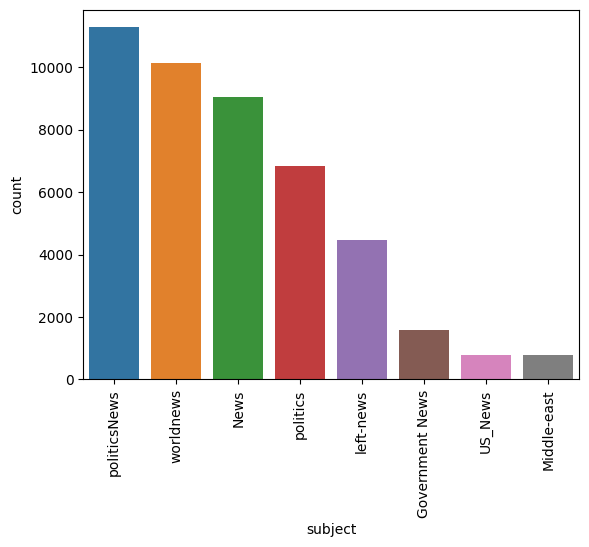

In [ ]:
sns.countplot(x='subject', data=data,order = data['subject'].value_counts().index)
plt.xticks(rotation=90);

In [ ]:
data['title'] + " " + data['text']

0         BREAKING: GOP Chairman Grassley Has Had Enoug...
1         Failed GOP Candidates Remembered In Hilarious...
2         Mike Pence’s New DC Neighbors Are HILARIOUSLY...
3        California AG pledges to defend birth control ...
4        AZ RANCHERS Living On US-Mexico Border Destroy...
                               ...                        
44893    Nigeria says U.S. agrees delayed $593 million ...
44894    Boiler Room #62 – Fatal Illusions Tune in to t...
44895    ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...
44896    Republican tax plan would deal financial hit t...
44897    U.N. refugee commissioner says Australia must ...
Length: 44898, dtype: object

In [ ]:
data.duplicated().sum()

209

In [ ]:
data[data.duplicated()]

,title,text,subject,date,label
4896,Vietnam police arrest ex-politburo member over...,HANOI (Reuters) - Vietnamese police on Friday ...,worldnews,"December 8, 2017",1
5270,Jailed British-Iranian charity worker received...,BEIRUT (Reuters) - A British-Iranian charity w...,worldnews,"October 17, 2017",1
5721,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",1
7188,Sessions confirmed as U.S. attorney general af...,WASHINGTON (Reuters) - A bitterly divided U.S....,politicsNews,"February 9, 2017",1
8105,South Africa's ANC calls for nationalizing cen...,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,"December 20, 2017",1
...,...,...,...,...,...
44551,China unveils new leadership line-up with no c...,BEIJING (Reuters) - China s ruling Communist P...,worldnews,"October 25, 2017",1
44810,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",1
44836,"Peru president, crying 'coup,' signals VPs wou...",LIMA (Reuters) - Peru s President Pedro Pablo ...,worldnews,"December 20, 2017",1
44870,Trump asks Supreme Court to block travel ban r...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,"July 14, 2017",1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [ ]:
#Add the title and text column

data['text'] = data['title'] + " " + data['text']

data.drop(['title','subject','date'], axis=1, inplace=True)

In [ ]:
data.head()

,text,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


In [ ]:
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau

import nltk
from nltk.corpus import stopwords
from textblob import Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only=False)

print(colored('\nLIBRARIES WERE SUCCESFULLY IMPORTED...', 'blue'))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head()

,text,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


<Axes: xlabel='label', ylabel='count'>

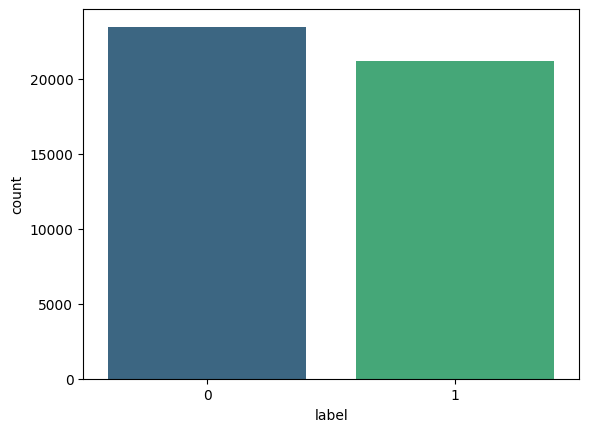

In [ ]:
sns.countplot(x='label', data=data, palette='viridis')

In [ ]:
#Lower the text

data['text'].apply(lambda x : " ".join(x.lower() for x in x.split()))

0        breaking: gop chairman grassley has had enough...
1        failed gop candidates remembered in hilarious ...
2        mike pence’s new dc neighbors are hilariously ...
3        california ag pledges to defend birth control ...
4        az ranchers living on us-mexico border destroy...
                               ...                        
44892    new york protesters camp out at goldman sachs ...
44894    boiler room #62 – fatal illusions tune in to t...
44895    atheists sue governor of texas over display on...
44896    republican tax plan would deal financial hit t...
44897    u.n. refugee commissioner says australia must ...
Name: text, Length: 44689, dtype: object

In [ ]:
# Remove punctuation and unnecessary characters
data['text'].apply(lambda x : " ".join(re.sub(r'[^a-zA-Z]','', x.lower()) for x in x.split()))


0        breaking  gop chairman grassley has had enough...
1        failed gop candidates remembered in hilarious ...
2        mike pence s new dc neighbors are hilariously ...
3        california ag pledges to defend birth control ...
4        az ranchers living on us mexico border destroy...
                               ...                        
44892    new york protesters camp out at goldman sachs ...
44894    boiler room       fatal illusions tune in to t...
44895    atheists sue governor of texas over display on...
44896    republican tax plan would deal financial hit t...
44897    u n  refugee commissioner says australia must ...
Name: text, Length: 44689, dtype: object

In [ ]:
text = ' '.join(title.split()[1] for title in data['text'])

In [ ]:
text

'GOP GOP Pence’s AG RANCHERS private Salafist says Easy FIGHTER Of air WDBJ OF Not CONTEST and Trump declines OF debate, to Bundy GETS FEED: repeals explained war 40,000 OBAMA-APPOINTED YORK AND U.S. Hun Wolf PROUD Shocking border passes Nationalist Choice’ British Kurds marks Staff Sessions ON \'no Republicans #159 PM CONGRESSWOMAN: Show’ Joe 117 Co-CEO loaned UNBELIEVABLE People Gets New chides has DEMOCRAT George Is ‘The ARMY gets places Johnson Lied Cleese Patent IMPLANTED WHISTLEBLOWER Responds fragments Central’s room sues least optimistic Republican FOX says HOLDS PM contractors ROUGE WikiLeaks’ should lukewarm SASHA Schaeuble Paul transfers African Palin South Hell RAMPS Trump Hilariously says Racist long US pick TRUMP ROOM THIS leader Destroys Doubles the POWELL decides NEWS THUGS GREW House STEYN Did INTEL DISCOVERY Claims credited Carson HAPPENED Campaign HILLARY’S says to Sessions’ BEWARE! Hillary bombers, committee RACE Vice dissident Barney protests wins Was Democratic OF

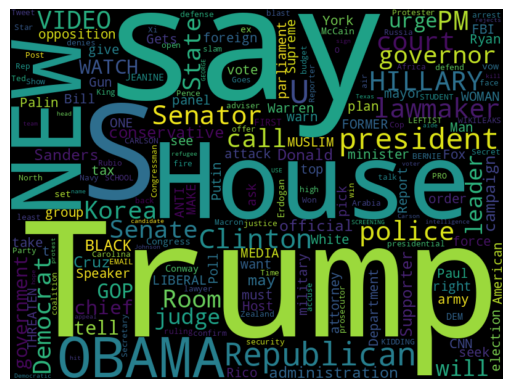

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'black', width=800, height=600).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#Lemmatization

data['text'].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]) )

0        BREAKING: GOP Chairman Grassley Has Had Enough...
1        Failed GOP Candidates Remembered In Hilarious ...
2        Mike Pence’s New DC Neighbors Are HILARIOUSLY ...
3        California AG pledge to defend birth control i...
4        AZ RANCHERS Living On US-Mexico Border Destroy...
                               ...                        
44892    New York protester camp out at Goldman Sachs t...
44894    Boiler Room #62 – Fatal Illusions Tune in to t...
44895    ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...
44896    Republican tax plan would deal financial hit t...
44897    U.N. refugee commissioner say Australia must s...
Name: text, Length: 44689, dtype: object

In [ ]:
#Joining all together in a function

def get_text(review):
  review = re.sub(r"[^a-zA-Z]",' ', review)
  review = review.lower()
  review = nltk.word_tokenize(review)
  stop_word = set(stopwords.words('english'))
  review = [Word(word).lemmatize() for word in review if word not in stop_word]

  return " ".join(review)

In [ ]:
#Apply the function
data['text'] = data['text'].apply(lambda x : get_text(x))

In [ ]:
data['text'] = data['text'].apply(lambda x : " ".join(re.sub(r'http\S+', '', x ) for x in x.split() ) )

In [ ]:
data.head(n = 10).style.background_gradient(cmap = 'summer')

,text,label
0,breaking gop chairman grassley enough demand trump jr testimony donald trump white house chaos trying cover russia problem mounting hour refuse acknowledge problem surrounding fake news hoax however fact bear thing differently seems crack congressional public leadership chuck grassley r iowa head senate judiciary committee fed demanding donald trump jr former trump campaign manager paul manafort testify committee regarding infamous shady meeting donald trump shady russian lawyer promised dirt democratic presidential nominee hillary clinton fact information due well demand sends signal team trump notably fire special counsel robert mueller circumstance despite fact seems seems trump white house laying groundwork speak speak tweet regarding grassley warning also anyone think senator grassley rest senate serious need look warning already given trump jr manafort either follow order served subpoena force comply refuse held contempt congress carry serious jail time even cruel craven creature within gop sick donald trump corruption scandal ridden white house angry staged hostile takeover party first birtherism giving permanently racist label decimating effort made pretend republican party hotbed racism turning world upside nation seems old timer like grassley clearly sick trump bullshit might one could save republic need bit courage featured image via win mcnamee getty image,0
1,failed gop candidate remembered hilarious mocking eulogy video donald trump presumptive gop nominee time remember candidate tried hard beat race white house forget misstep gaffe weirdness sheer idiocy candidate jeb bush marco rubio john kasich ted cruz ben carson carly fiorina video making round twitter eulogizes three failed candidate though dead gop might well dead point anyway appropriately titled eulogy gop people make short speech candidate past man actually say jeb bush qualified president fake tear journalist comedienne francesca fiorentini saying dearly beloved gathered today commemorate candidate longer u one man speaking amusing circus rendition chopin funeral march remembers jeb way jeb hardly knew ye bad policy find way republican morass indeed like jeb policy invisible sometimes although many felt would win nomination early best performance often came debate get fight donald trump virtually everything sun also bad habit defending brother action iraq memorably saying relates brother one thing know sure kept u safe moving marco rubio fiorentini say called many thing young charming lil marco last nickname course reference trump penchant name calling man speaking spanish remembers rubio way marco normal boy another said involvement gang eight immigration bill killed candidate fiorentini reply people die gang violence died gang eight violence maker video saved absolute best last course ben carson dear dr carson one speaker say would gently rock sleep monotone voice carson especially well known seemingly asleep half time saw eye open wide surprising likely surprised voice soft speech slow really hard stay awake talking imagine giving state union address see whole video especially spectacular ending carson eulogy watch take moment say g bye gop candidate http co bl zv aj ajplus may featured image via screen capture embedded video,0
2,mike penny new dc neighbor hilariously trolling homophobic bigot mike penny huge homophobe support ex gay conversion therapy opposes hate crime protection lgbtq people staunchly marriage equality said belief sex couple lead societal collapse end folk forced live near vice president elect near newly rented house washington dc none happy new neighbor however instead protesting rally street decided troll instead resident chevy chase neighborhood hanging large rainbow flag home send signal mike penny homophobia welcome neck wood according local station wjla respectful message showing case disagreement thinking said ilse heintzen heintzen referring vice president elect mike penny penny moved house heintzen block st

In [ ]:
data.head()

,text,label
0,breaking gop chairman grassley enough demand t...,0
1,failed gop candidate remembered hilarious mock...,0
2,mike penny new dc neighbor hilariously trollin...,0
3,california ag pledge defend birth control insu...,1
4,az rancher living u mexico border destroy nanc...,0


In [ ]:
data['label'].value_counts()

0    23478
1    21211
Name: label, dtype: int64

In [ ]:
X = data['text']

y = data['label']

In [ ]:
#Training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11)

In [ ]:
print(X_train.shape, X_test.shape)

(33516,) (11173,)


In [ ]:
#Tokenizing the word
tokenizer =Tokenizer(num_words=10000)

tokenizer.fit_on_texts(X_train)

tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
max_length = 300

In [ ]:
#Padding the word to be in the same length

tokenized_train_pad = pad_sequences(tokenized_train, maxlen=max_length)
tokenized_test_pad = pad_sequences(tokenized_test, maxlen=max_length)


In [ ]:
#Earky stopping to track when our model overfit

lr_reduce = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, factor = 0.5, min_lr = 0.00001 )

In [ ]:
#Model Building
model = Sequential()


#Embedding layer
model.add(Embedding(10000, output_dim=100, input_length = max_length))
#Input layer
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.3))
model.add(Dropout(0.2))


model.add(LSTM(units=64, recurrent_dropout=0.3))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          117248    
                                                                 
 dropout_2 (Dropout)         (None, 300, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
history = model.fit(x=tokenized_train_pad, y=y_train, epochs=10, batch_size=128,
                    validation_data = (tokenized_test_pad, y_test), callbacks=[lr_reduce])

Epoch 1/10
262/262 [==============================] - 664s 2s/step - loss: 0.5357 - accuracy: 0.6864 - val_loss: 0.1379 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 2/10
262/262 [==============================] - 650s 2s/step - loss: 0.0829 - accuracy: 0.9735 - val_loss: 0.1208 - val_accuracy: 0.9648 - lr: 0.0010
Epoch 3/10
262/262 [==============================] - 618s 2s/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0618 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 4/10
262/262 [==============================] - 620s 2s/step - loss: 0.0246 - accuracy: 0.9936 - val_loss: 0.0552 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/10
262/262 [==============================] - 601s 2s/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0761 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 6/10
262/262 [==============================] - 599s 2s/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0610 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 7/10
262/262 [==============================] - 595s 2s/st

In [ ]:
train_accuracy= history.history['accuracy']
train_loss = history.history['loss']

In [ ]:
loss = pd.DataFrame(history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy,lr
0,0.535749,0.686448,0.137858,0.955697,0.0010
1,0.082930,0.973475,0.120780,0.964826,0.0010
2,0.059684,0.982098,0.061772,0.982010,0.0010
3,0.024619,0.993645,0.055205,0.985143,0.0010
4,0.015511,0.995554,0.076103,0.984516,0.0010
5,0.012245,0.996360,0.060988,0.987022,0.0010
6,0.016934,0.994510,0.086215,0.977267,0.0010
7,0.011942,0.996509,0.060624,0.985501,0.0010
8,0.004671,0.998956,0.062337,0.988544,0.0005
9,0.002553,0.999642,0.066143,0.987738,0.0005


<Axes: >

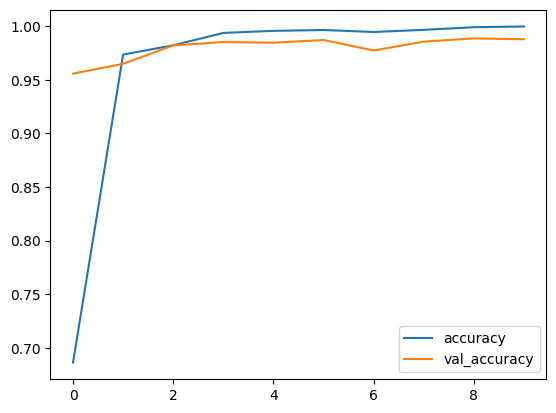

In [ ]:
loss[['accuracy','val_accuracy']].plot()

<Axes: >

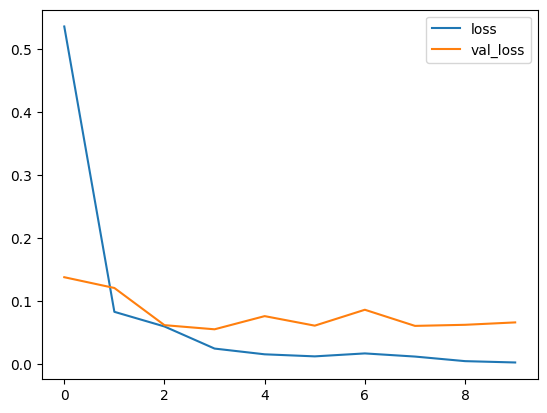

In [ ]:
loss[['loss','val_loss']].plot()

In [ ]:
predictions

array([[9.9988759e-01],
       [9.9992514e-01],
       [1.8574336e-05],
       ...,
       [2.1614162e-04],
       [9.9940753e-01],
       [8.4543928e-05]], dtype=float32)

In [ ]:
model.evaluate(tokenized_test_pad, y_test)

350/350 [==============================] - 57s 164ms/step - loss: 0.0661 - accuracy: 0.9877


[0.0661424919962883, 0.987738311290741]

In [ ]:
pre = predictions > 0.5

In [ ]:
print(classification_report(y_test, pre))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5849
           1       0.99      0.99      0.99      5324

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [ ]:
pre.astype(int)

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])